# Example runs of linear models

This notebook shows some example runs of the models in "linear_models.py".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from linear_models import Perceptron
from common import find_accuracy, plot_2d_blobs, integer_one_hot_encode
np.random.seed(57)

## Perceptron

Let us first start with the perceptron. The perseptron is a model with linear weights and a Heaviside activiation / output function. It can be used for binary or multiclass classification. It updates its weight only with a wrong guess.

It is pretty limited in its flexibility, since it can only make a *linear decision boundry*. However, with many output nodes it can still classify according to many linearities, and if the data is *linearly seperably* (it can be perfectly classified with a linear boundry), the Perceptron will always converge in a finite amount of steps.

Let us first then start to look at some data that is linearly seperable. We will just look at the flexibility, so we do not split in training and validation sets.

## Binary classification with two input features

With two features and two classes we can easily plot the data and decision boundry.

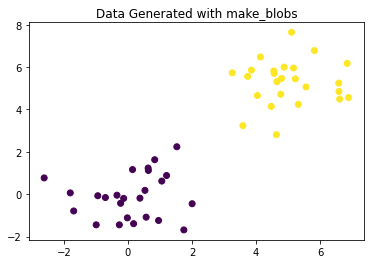

In [2]:
np.random.seed(57)
n_observations = 50
n_features = 2
centers = [[0, 0], [5, 5]]  # Make the centers far from each other so it becomes linearly seperable.
x_blobs, y_blobs = make_blobs(n_observations, n_features, centers=centers, cluster_std=[1, 1])
x_train_blobs, x_val_blobs, y_train_blobs, y_val_blobs = train_test_split(x_blobs, y_blobs, test_size=0.25)
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")

In [3]:
cl = Perceptron(n_features=2, n_outputs=1)
cl.train(x_blobs, y_blobs, batch_size=11, epochs=10)
preds = cl.predict(x_blobs)
print(f"Accuracy for Perceptron model was {find_accuracy(preds[:, 0], y_blobs)}")

Early stopping in Perceptron after epoch 4
Accuracy for Perceptron model was 1.0


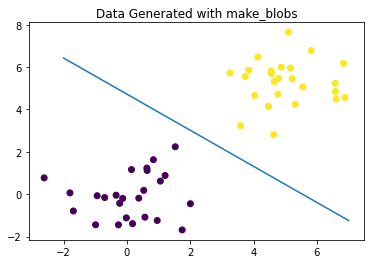

In [4]:
# Plot the decision boundry (solve w_0 * bias + w_1 * x_1 + w_2 * x_2 = 0 with respect to x_2).
x_values = np.linspace(-2, 7)
y_values = - cl.weights[0, 0] / cl.weights[0, 1] * x_values - cl.biases[0] / cl.weights[0, 1]
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")
plt.plot(x_values, y_values)
plt.show()

We see that the Perceptron manage to converge (rather quickly) to a decision boundry that perfectly classified the data.

## Mutliclass classification

Let us now look at multiclass classification. We then need many output nodes for the perceptron. We also need to one-hot-econde the target.

Early stopping in Perceptron after epoch 2
Accuracy for Perceptron model was 1.0


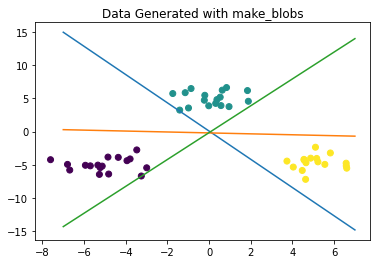

In [5]:
# Many output features:
np.random.seed(57)
n_observations = 50
n_features = 2
centers = [[-5, -5], [0, 5], [5, -5]]  # Be sure to make the data linearly seperable
x_blobs, y_blobs = make_blobs(n_observations, n_features, centers=centers, cluster_std=[1, 1, 1])
x_train_blobs, x_val_blobs, y_train_blobs, y_val_blobs = train_test_split(x_blobs, y_blobs, test_size=0.25)
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")

# OneHotEconde
y2 = integer_one_hot_encode(y_blobs)

cl = Perceptron()
cl.train(x_blobs, y_blobs, batch_size=11, epochs=100)  # The train function can also one-hot-encode

preds = cl.predict(x_blobs)
# Plot decision boundry (solve w_0 * bias + w_1 * x_1 + w_2 * x_2 = 0 with respect to x_2, for each output node)
x_values = np.linspace(-7, 7, 100)
y_values1 = - cl.weights[0, 0] / cl.weights[0, 1] * x_values - cl.biases[0, 0] / cl.weights[0, 1]
y_values2 = - cl.weights[1, 0] / cl.weights[1, 1] * x_values - cl.biases[1, 0] / cl.weights[1, 1]
y_values3 = - cl.weights[2, 0] / cl.weights[2, 1] * x_values - cl.biases[2, 0] / cl.weights[2, 1]

plt.plot(x_values, y_values1)
plt.plot(x_values, y_values2)
plt.plot(x_values, y_values3)
print(f"Accuracy for Perceptron model was {find_accuracy(preds, y2)}")

We see that it again quickly converges to a perfect classification.

## Many input features

Let us try with many input features and output nodes. This can not be plotted easily, so we will just see if it converges and classifies correctly.

In [6]:
# Many input features (5):
np.random.seed(57)
n_observations = 50
n_features = 5
centers = [[0, 0, 0, 0, 0], [0, 10, 0, 0, 0], [10, 10, 0, 0, 0], [10, 0, 0, 0, 0]]
x_blobs, y_blobs = make_blobs(n_observations, n_features, centers=centers, cluster_std=[1, 1, 1, 1])
x_train_blobs, x_val_blobs, y_train_blobs, y_val_blobs = train_test_split(x_blobs, y_blobs, test_size=0.25)

y2 = np.zeros((y_blobs.size, y_blobs.max() + 1))
y2[np.arange(y_blobs.size), y_blobs] = 1

cl = Perceptron(n_features, 4)
cl.train(x_blobs, y2, batch_size=11, epochs=100)
preds = cl.predict(x_blobs)

print(f"Accuracy for Perceptron model was {find_accuracy(preds, y2)}")

Early stopping in Perceptron after epoch 87
Accuracy for Perceptron model was 1.0


## Non-linearly seperable data

When the data is non lnearly separable, the Perceptron will sometimes find a decent boundry, but will not converge.

Accuracy for Perceptron model was 0.96


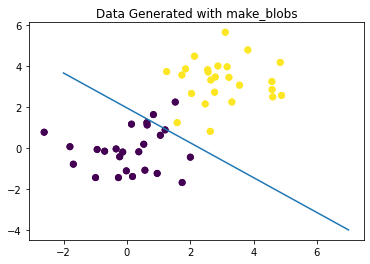

In [7]:
np.random.seed(57)
n_observations = 50
n_features = 2
centers = [[0, 0], [3, 3]]  # Make the centers far from each other so it becomes linearly seperable.
x_blobs, y_blobs = make_blobs(n_observations, n_features, centers=centers, cluster_std=[1, 1])
x_train_blobs, x_val_blobs, y_train_blobs, y_val_blobs = train_test_split(x_blobs, y_blobs, test_size=0.25)
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")
cl = Perceptron(n_features=2, n_outputs=1)
cl.train(x_blobs, y_blobs, batch_size=11, epochs=10)
preds = cl.predict(x_blobs)
print(f"Accuracy for Perceptron model was {find_accuracy(preds[:, 0], y_blobs)}")
# Plot the decision boundry (solve w_0 * bias + w_1 * x_1 + w_2 * x_2 = 0 with respect to x_2).
x_values = np.linspace(-2, 7)
y_values = - cl.weights[0, 0] / cl.weights[0, 1] * x_values - cl.biases[0] / cl.weights[0, 1]
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")
plt.plot(x_values, y_values)
plt.show()

# Linear Regression

Let us now try the linear regression class. We will first try with one feature and plot 2d, then two features and plot 3d

## One feature

We will make some data by simply adding some noise to a linear function. We can then predict and plot. Once again, we are not interested in the actual performance of the model, only how it works and can be used, so we do not split in training and test (or validation) datasets.

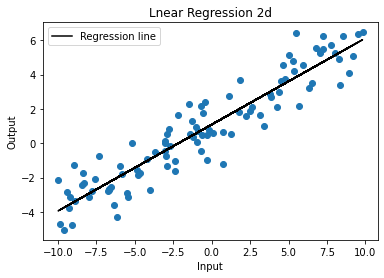

In [8]:
from linear_models import LinearRegression
np.random.seed(57)
n_points = 100
noise = np.random.normal(0, 1, n_points)  # Create random noise
x_data = np.random.uniform(-10, 10, n_points)  # Create points randomly along the x-axis
y_data = 0.5 * x_data + noise + 1 # Make function as a linear function of the input plus the noise plus an intercept
reg = LinearRegression(1)
reg.train(x_data, y_data, method="analytic")  # Train the model
preds = reg.predict(x_data)

plt.scatter(x_data, y_data)  # Plot training observations
plt.plot(x_data, preds, label="Regression line", c="black")  # Plot regression model
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Lnear Regression 2d")
plt.legend()
plt.show()

### Gradient descent

Which is about what we would expect for a linear regression model. We can do this with an iterative update of the coefficient as well. We will also provide a validation set, so we can plot the losses during the epochs. The stopping criteria will be determined by a tolerance.

Early stopping after epoch 57 with tolerance 0.01.


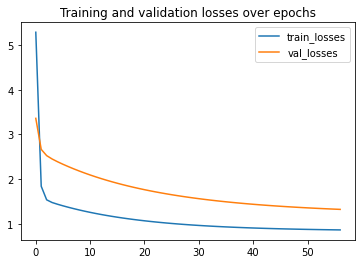

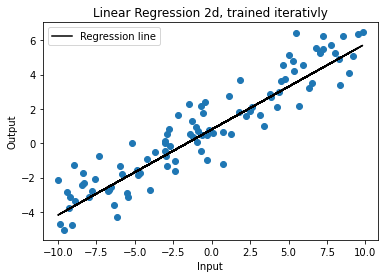

In [9]:
np.random.seed(57)
x_train = x_data[:75]  # Split data in training and validation sets
y_train = y_data[:75]
x_val = x_data[75:]
y_val = y_data[75:]
reg = LinearRegression(verbose=True)
reg.train(x_train, y_train, method="gradient_descent", eval_set=(x_val, y_val), 
          eta=0.01, batch_size=20, epochs=200, tol=0.01)  # Train with various hyperparameters
preds = reg.predict(x_data) 

x_points = np.arange(reg.epochs_ran)  # Make x-points for the epochs
plt.plot(x_points, reg.train_losses[:reg.epochs_ran], label="train_losses")  # Plot training and validation losses
plt.plot(x_points, reg.val_losses[:reg.epochs_ran], label="val_losses")
plt.legend()
plt.title("Training and validation losses over epochs")
plt.show()

plt.scatter(x_data, y_data)  # Plot training observations
plt.plot(x_data, preds, label="Regression line", c="black")  # Plot regression model
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Linear Regression 2d, trained iterativly")
plt.legend()
plt.show()

This solution will converge to the analyticly best solution, given that the learning rate is not too high. Note that we only used a subset of the data, so the gradient descent algorithm will perform a bit differntly in this case. The plots looks decent :) The spike in training error in epoch 1 is due to the stochastic subset yielding very large variance in the very beginning.

## Linear regression with two features

We will now make some synthetic data of the same kind, but with one more feature. The big difference now is that we will plot in 3d. We also have one more method to test out, Newtons method. There is of course no reason to use this in practice, since we can just find the exact solution, but it is implemented so we (or I) can learn more. Let us use Newtons method. For some reason it converges rather slowly.

Early stopping after epoch 148 with tolerance 0.1.


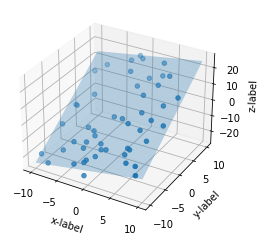

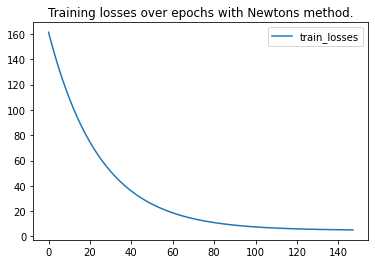

In [10]:
np.random.seed(57)
n_points = 50
noise = np.random.normal(0, 1, (n_points, 2))  # Make noise vector in two dimensions
x_data1 = np.random.uniform(-10, 10, n_points)  # Make random points from feature
x_data2 = np.random.uniform(-10, 10, n_points)
x_data = np.zeros((n_points, 2))  # Concatenate the points created
x_data[:, 0] = x_data1
x_data[:, 1] = x_data2

z_data = 0.5 * (x_data1 + noise[:, 0]) + 2 * (x_data2 + noise[:, 1])  # Make the true target as a linear sum plus noise
reg = LinearRegression(2, verbose=True)
reg.train(x_data, z_data, method="newton", epochs=200, tol=0.1)

ax = plt.figure().add_subplot(projection="3d")  # Make 3d figure

ax.scatter(x_data1, x_data2, z_data)  # Plot original points
x_lin = np.linspace(-10, 10, n_points)  # Make new, evenly distributed points for the regression plane
y_lin = np.linspace(-10, 10, n_points)
x_data3d, y_data3d = np.meshgrid(x_lin, y_lin)  # Create meshgrid (x repeats rows and y repeats columns
preds3d = reg.betas[1] * x_data3d + reg.betas[2] * y_data3d + reg.betas[0]  # Plot the regression plane
ax.plot_surface(x_data3d, y_data3d, preds3d, alpha=0.3)  # Alpha gives transparency

ax.set_xlabel("x-label")
ax.set_ylabel("y-label")
ax.set_zlabel("z-label")
plt.show()

x_points = np.arange(reg.epochs_ran)  # Make x-points for the epochs
plt.plot(x_points, reg.train_losses[:reg.epochs_ran], label="train_losses")  # Plot training and validation losses
plt.legend()
plt.title("Training losses over epochs with Newtons method.")
plt.show()

This looks pretty nice. However, note that when run in terminal, the plot is interactive and even prettier.